In [63]:
import numpy
import numpy as np
import pandas
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
seed = 7
numpy.random.seed(seed)

In [59]:
# load dataset
images = []
labels = []
from imutils import paths
for imagePath in paths.list_images("/home/vishay/Downloads/tipr-second-assignment-master/data/MNIST"):
    images.append(cv2.imread(imagePath,0).flatten())
    labels.append(imagePath.split('/')[-2])
images = np.array(images)
labels = np.array(labels,dtype = int)  

In [60]:
#encode integer values to categorical
dummy_y = np_utils.to_categorical(labels)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, dummy_y, test_size=0.33, random_state=42)

In [62]:
def build_model():
    global hidden_layer_sizes
    model = Sequential()

    model.add(Dense(hidden_layer_sizes[0], input_dim=784))
    model.add(Activation('relu'))

    for layer_size in hidden_layer_sizes[1:]:
        model.add(Dense(layer_size))
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [73]:
accuracy = []
f1micro = []
f1macro = []
for i in range(1,13):
    hidden_layer_sizes = [100]*i
               
    estimator = KerasClassifier(build_fn=build_model, epochs=3, batch_size=50, verbose=1)
    estimator.fit(X_train,y_train)
    s = estimator.predict(X_test)
    label = [np.argmax(y_test[i,:]) for i in range(len(y_test))]
    label = np.array(label)
    total = 0
    correct = 0
    for i in range(len(s)):
        total += 1
        if s[i] == label[i]:
            correct += 1
    acc = correct/total

    f1mi = f1_score(label, s, average='macro',labels=np.unique(s) )  
    f1ma = f1_score(label, s, average='micro',labels=np.unique(s)) 
    
    accuracy.append(acc)
    f1micro.append(f1mi)
    f1macro.append(f1ma)


Epoch 1/3
28140/28140 [==============================] - 5s 189us/step - loss: 11.1006 - acc: 0.3093
Epoch 2/3
28140/28140 [==============================] - 3s 102us/step - loss: 10.3850 - acc: 0.3549
Epoch 3/3
13860/13860 [==============================] - 2s 142us/step
Epoch 1/3
28140/28140 [==============================] - 6s 200us/step - loss: 10.3783 - acc: 0.3523
Epoch 2/3
28140/28140 [==============================] - 3s 108us/step - loss: 8.0845 - acc: 0.4955
Epoch 3/3
13860/13860 [==============================] - 2s 145us/step
Epoch 1/3
28140/28140 [==============================] - 6s 202us/step - loss: 10.1251 - acc: 0.3681
Epoch 2/3
28140/28140 [==============================] - 3s 115us/step - loss: 9.3239 - acc: 0.4197
Epoch 3/3
13860/13860 [==============================] - 2s 150us/step
Epoch 1/3
28140/28140 [==============================] - 6s 211us/step - loss: 11.7751 - acc: 0.2657
Epoch 2/3
28140/28140 [==============================] - 3s 117us/step - loss: 10.

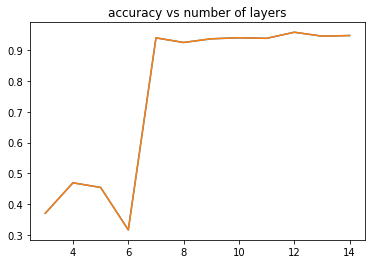

In [81]:
plt.plot(range(3,15),accuracy)

plt.title("accuracy vs number of layers")
x = np.array(range(3,15))
y = np.array(accuracy)
plt.plot(x, y)
plt.show()

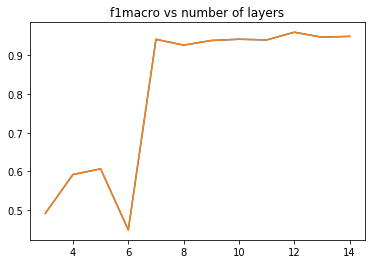

In [78]:
plt.plot(range(3,15),f1macro)

plt.title("f1macro vs number of layers")

x = np.array(range(3,15))
y = np.array(f1macro)
plt.plot(x, y)
plt.show()

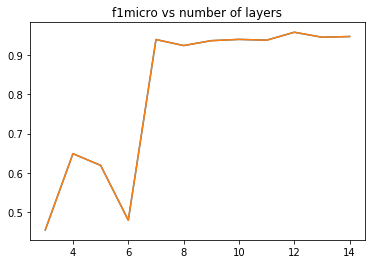

In [79]:
plt.plot(range(3,15),f1micro)
plt.title("f1micro vs number of layers")


x = np.array(range(3,15))
y = np.array(f1micro)
plt.plot(x, y)
plt.show()

In [26]:
hidden_layer_sizes = [100]*2

estimator = KerasClassifier(build_fn=build_model, epochs=1, batch_size=50, verbose=1)
estimator.fit(X_train,y_train)

Epoch 1/1
28140/28140 [==============================] - 4s 129us/step - loss: 9.5076 - acc: 0.4067


In [45]:
s = estimator.predict(X_test)

13860/13860 [==============================] - 1s 40us/step


In [48]:
label = [np.argmax(y_test[i,:]) for i in range(len(y_test))]

In [51]:
label = np.array(label)

In [52]:
#get accuracy
total = 0
correct = 0
for i in range(len(s)):
    total += 1
    if s[i] == label[i]:
        correct += 1

In [55]:

f1mi = f1_score(label, s, average='macro',labels=np.unique(label) )  
f1ma = f1_score(label, s, average='micro',labels=np.unique(label)) 

/home/vishay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:

acc = (label == s).mean()
print("accuracy = "+str(acc*100)+" %")

/home/vishay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


AttributeError: 'bool' object has no attribute 'mean'

In [50]:
label

[7,
 5,
 1,
 4,
 5,
 4,
 6,
 5,
 4,
 7,
 3,
 1,
 2,
 7,
 1,
 8,
 7,
 3,
 9,
 4,
 0,
 9,
 6,
 2,
 6,
 9,
 0,
 6,
 7,
 2,
 1,
 9,
 6,
 8,
 2,
 9,
 1,
 6,
 1,
 9,
 3,
 5,
 8,
 2,
 3,
 2,
 2,
 3,
 2,
 6,
 6,
 8,
 9,
 7,
 4,
 6,
 1,
 8,
 4,
 9,
 8,
 0,
 3,
 9,
 9,
 9,
 1,
 5,
 6,
 8,
 2,
 6,
 7,
 3,
 5,
 5,
 6,
 0,
 8,
 2,
 9,
 0,
 2,
 5,
 1,
 8,
 6,
 2,
 0,
 2,
 7,
 6,
 2,
 4,
 1,
 8,
 7,
 5,
 0,
 1,
 4,
 0,
 6,
 2,
 1,
 8,
 9,
 0,
 0,
 3,
 2,
 7,
 7,
 9,
 8,
 7,
 2,
 0,
 7,
 5,
 9,
 6,
 0,
 0,
 3,
 2,
 0,
 4,
 9,
 2,
 1,
 2,
 9,
 2,
 1,
 1,
 1,
 7,
 9,
 1,
 0,
 4,
 4,
 4,
 1,
 6,
 2,
 1,
 0,
 1,
 6,
 6,
 5,
 0,
 0,
 8,
 0,
 8,
 3,
 0,
 9,
 7,
 1,
 9,
 5,
 7,
 0,
 0,
 8,
 7,
 7,
 3,
 6,
 1,
 3,
 7,
 0,
 2,
 0,
 7,
 8,
 3,
 9,
 3,
 2,
 4,
 0,
 4,
 8,
 9,
 4,
 0,
 9,
 0,
 0,
 1,
 7,
 2,
 3,
 2,
 7,
 4,
 1,
 6,
 6,
 0,
 7,
 6,
 4,
 7,
 1,
 7,
 4,
 8,
 2,
 9,
 3,
 9,
 2,
 5,
 3,
 4,
 5,
 2,
 9,
 4,
 1,
 1,
 8,
 5,
 2,
 5,
 4,
 7,
 0,
 0,
 2,
 3,
 5,
 6,
 6,
 1,
 7,
 8,
 8,
 3,
 5,
 3,
 1,
 9,


In [38]:
total = 0
correct = 0
for i in range(len(s)):
    total += 1
    if s[i] == label[i]:
        correct += 1

In [53]:
correct/total

0.44581529581529583

In [43]:
X_train.shape

(28140, 784)

In [47]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [57]:
f1ma

0.44581529581529583